In [1]:
 #ENERGY PRODUCTION PREDICTON

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import streamlit as st

In [6]:
st.title('Energy Production Predition')

2024-01-05 11:46:50.132 
  command:

    streamlit run C:\Users\APARNA\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [7]:
st.sidebar.header('User Input Parameters')

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [10]:
def main():
    st.title("Energy Production Prdiction")
    temperature=st.sidebar.number_input("float")
    exhaust_vacuum=st.sidebar.number_input("float")
    amb_pressure=st.sidebar.number_input("float")
    r_humidity=st.sidebar.number_input("float")

    data={'Temperature':temperature,
          'Exhaust_Vacuum':exhaust_vacuum,
          'AMB_Pressure':amb_pressure, 
          'R_humidity':r_humidity,
          }
    features=pd.DataFrame(data,index=[0])
    result=""
    if st.button("Predict"):
            result=predict(temperature,exhaust_vacuum,amb_pressure,r_humidity)
            st.success('The Energy Produced is:',format(result))
if __name__=='__main__':
    main()

In [6]:
data = pd.read_csv('Copy of energy_production (1).csv',delimiter=";")
data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [7]:
data.tail()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [8]:
data.shape

(9568, 5)

In [9]:
data.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


## Remove duplicates

In [109]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9563    False
9564    False
9565    False
9566    False
9567    False
Length: 9568, dtype: bool

In [110]:
data[data.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [111]:
data.drop_duplicates(inplace=True)
data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [112]:
data.reset_index(drop=True, inplace=True)
data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9522,17.10,49.69,1005.53,81.82,457.32
9523,24.73,65.34,1015.42,52.80,446.92
9524,30.44,56.24,1005.19,56.24,429.34
9525,23.00,66.05,1020.61,80.29,421.57


## Rename Columns

In [113]:
data.rename(columns={'temperature':'Temp','exhaust_vacuum': 'Exh_vacuum','amb_pressure':'Amb_pressure','r_humidity':'Rel_humidity','energy_production':'Energy_production'}, inplace=True)
data

,Temp,Exh_vacuum,Amb_pressure,Rel_humidity,Energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9522,17.10,49.69,1005.53,81.82,457.32
9523,24.73,65.34,1015.42,52.80,446.92
9524,30.44,56.24,1005.19,56.24,429.34
9525,23.00,66.05,1020.61,80.29,421.57


In [114]:
data.columns

Index(['Temp', 'Exh_vacuum', 'Amb_pressure', 'Rel_humidity',
       'Energy_production'],
      dtype='object')

## Replacing Nulls /Data imputation

In [115]:
data.isnull()

,Temp,Exh_vacuum,Amb_pressure,Rel_humidity,Energy_production
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9522,False,False,False,False,False
9523,False,False,False,False,False
9524,False,False,False,False,False
9525,False,False,False,False,False


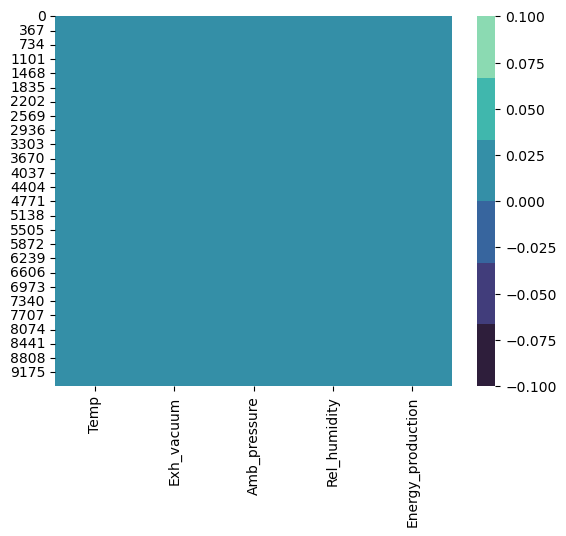

In [17]:
pal =sns.color_palette('mako')
sns.heatmap(data2.isnull(), cmap=pal)
plt.show()

In [116]:
data.isnull().sum()

Temp                 0
Exh_vacuum           0
Amb_pressure         0
Rel_humidity         0
Energy_production    0
dtype: int64

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp               9527 non-null   float64
 1   Exh_vacuum         9527 non-null   float64
 2   Amb_pressure       9527 non-null   float64
 3   Rel_humidity       9527 non-null   float64
 4   Energy_production  9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


In [118]:
data.shape

(9527, 5)

## Correlation Analysis

In [119]:
data.corr()

,Temp,Exh_vacuum,Amb_pressure,Rel_humidity,Energy_production
Temp,1.000000,0.843689,-0.508222,-0.543947,-0.947908
Exh_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
Amb_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
Rel_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
Energy_production,-0.947908,-0.869900,0.518687,0.391175,1.000000


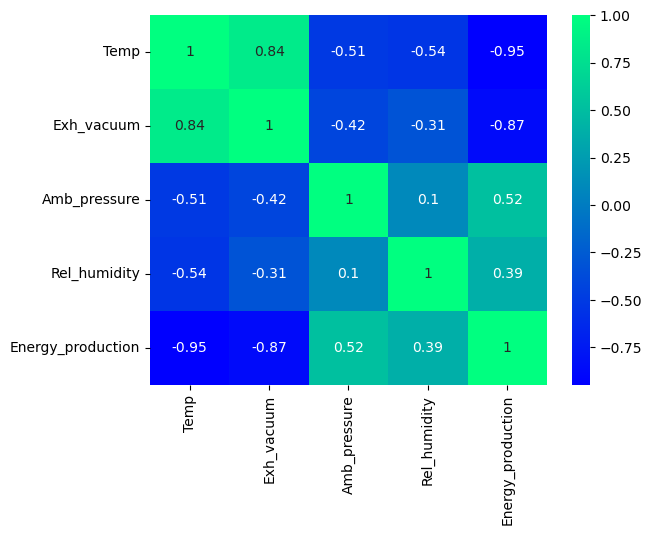

In [23]:
sns.heatmap(data3.corr(), cmap='winter', annot=True)
plt.show()

In [24]:
columns=data.columns

In [25]:
columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

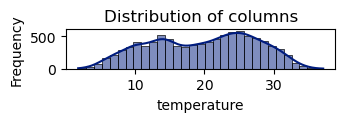

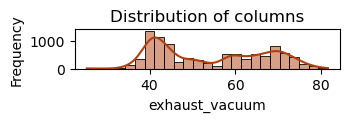

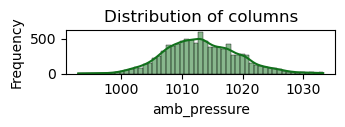

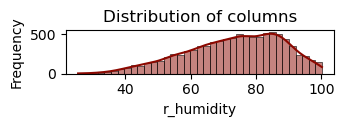

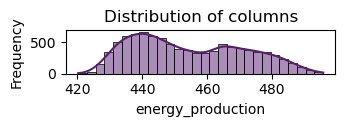

In [26]:
num_rows=len(columns)
num_cols=2
colors=sns.color_palette("dark",n_colors=num_rows)
for i,(column,color)in enumerate(zip(columns,colors)): 
    plt.subplot(num_rows,num_cols,i+1)
    sns.histplot(data[column],color=color,kde=True)
    plt.title('Distribution of columns')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

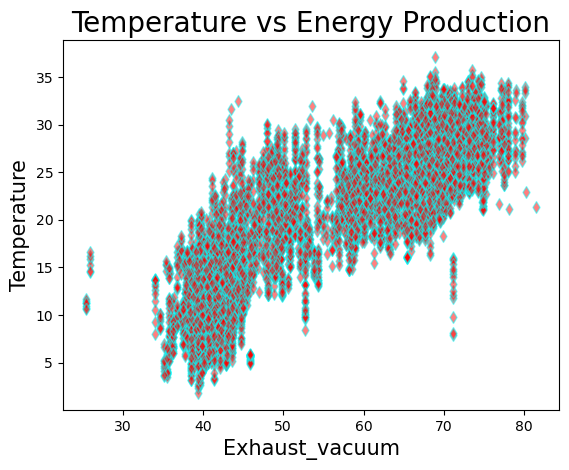

In [27]:
plt.scatter(data3['Exh_vacuum'], data3['Temp'], color='red', alpha=0.5, 
            edgecolors='cyan', marker = 'd')
plt.title('Temperature vs Energy Production', fontsize=20)
plt.xlabel('Exhaust_vacuum',fontsize=15)
plt.ylabel('Temperature',fontsize=15)
plt.show()

In [28]:
import warnings
warnings.filterwarnings('ignore')

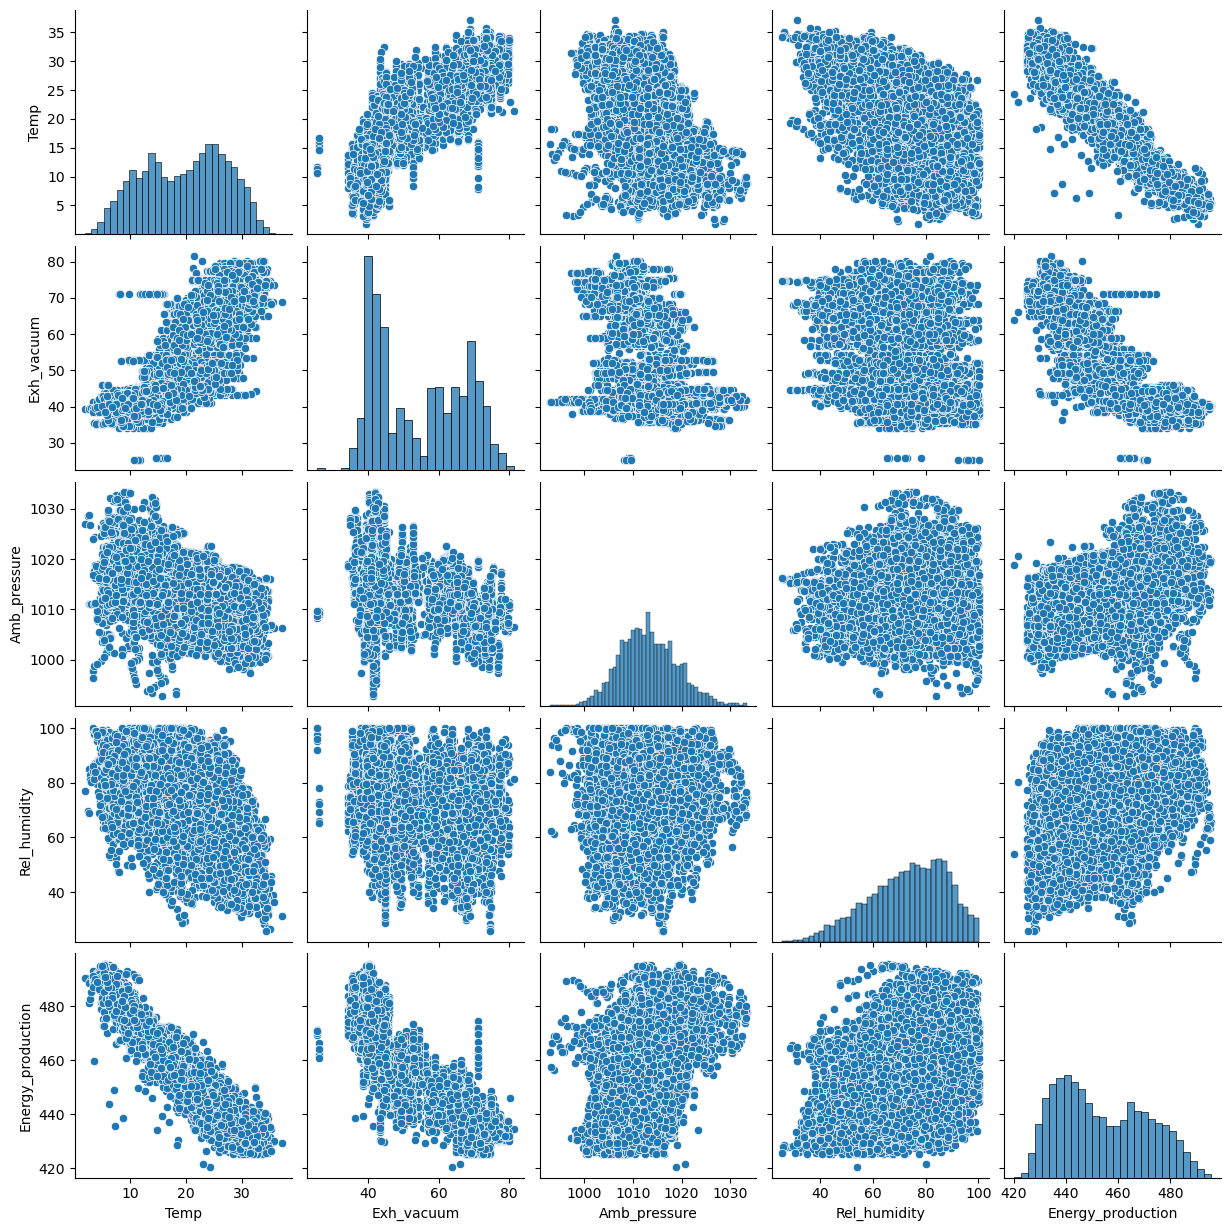

In [29]:
sns.pairplot(data=data3)
plt.show()

### Outliers Analysis

In [120]:
data.describe()

,Temp,Exh_vacuum,Amb_pressure,Rel_humidity,Energy_production
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


In [31]:
from scipy import stats

In [32]:
z_score=stats.zscore(data3)

In [33]:
z_score

,Temp,Exh_vacuum,Amb_pressure,Rel_humidity,Energy_production
0,-1.352528,-1.240254,0.635148,-0.906085,1.582568
1,-1.023404,-0.942279,1.091361,1.460630,0.647023
2,-0.777569,-0.726287,1.882578,0.571999,0.654066
3,-0.797719,0.000519,0.783291,0.393315,0.746212
4,-0.606961,-0.366826,1.774838,0.113992,0.542551
...,...,...,...,...,...
9522,-0.343662,-0.362884,-1.297442,0.580899,0.175141
9523,0.681323,0.870794,0.367481,-1.405854,-0.435252
9524,1.448383,0.153447,-1.354679,-1.170346,-1.467052
9525,0.448922,0.926763,1.241187,0.476153,-1.923087


In [34]:
threshold=2
outliers=data3[(np.abs(z_score)> threshold).any(axis=1)]
print("outliers:",outliers)

outliers:        Temp  Exh_vacuum  Amb_pressure  Rel_humidity  Energy_production
13    29.56       52.84       1006.09         42.17             436.46
30    33.94       74.67       1015.94         28.16             427.98
32     5.62       41.38       1020.91         86.21             490.83
34    18.44       39.72       1001.14         66.83             460.44
35    12.78       41.04       1025.16         85.14             461.61
...     ...         ...           ...           ...                ...
9462  12.02       41.92       1030.10         84.45             465.82
9473  27.61       49.16       1005.01         35.63             441.18
9482  27.94       49.16       1004.22         35.46             436.75
9497  28.47       69.23       1013.18         40.73             434.12
9498   5.49       38.50       1012.18         79.33             490.84

[958 rows x 5 columns]


In [121]:
print(data.iloc[13])

Temp                   29.56
Exh_vacuum             52.84
Amb_pressure         1006.09
Rel_humidity           42.17
Energy_production     436.46
Name: 13, dtype: float64


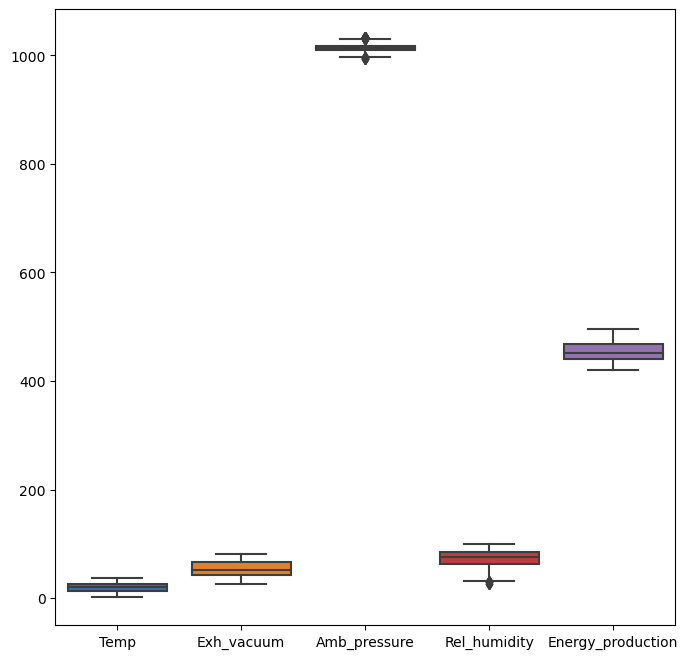

In [122]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data)
plt.show()

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [124]:
X = data.final.iloc[:,:4]
y = data.final.iloc[:,4]

In [41]:
X

,Temp,Exh_vacuum,Amb_pressure,Rel_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9522,17.10,49.69,1005.53,81.82
9523,24.73,65.34,1015.42,52.80
9524,30.44,56.24,1005.19,56.24
9525,23.00,66.05,1020.61,80.29


In [42]:
y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9522    457.32
9523    446.92
9524    429.34
9525    421.57
9526    454.41
Name: Energy_production, Length: 9527, dtype: float64

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7621, 4), (1906, 4), (7621,), (1906,))

In [44]:
numeric_features = X.columns


In [45]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [46]:
preprocessor = numeric_transformer

In [47]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


__________________________________________________________________________

# Build the regression model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg_model = LinearRegression()

## Train the model

In [50]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [51]:
train_pred = reg_model.predict(X_train)
train_pred

array([449.62231879, 444.45189666, 445.99766139, ..., 464.29303028,
       453.85945189, 435.44346169])

In [52]:
test_pred = reg_model.predict(X_test)
test_pred

array([436.45745179, 447.7676027 , 455.05042553, ..., 483.83135532,
       439.41130261, 448.66738734])

### Find the metrices for regression

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [54]:
train_mse = mean_squared_error(y_train, train_pred)
train_mse

20.758254505653177

In [55]:
test_mse = mean_squared_error(y_test, test_pred)
test_mse

20.8782388579529

In [56]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [57]:
train_rmse

4.556122749186327

In [58]:
train_rmse

4.556122749186327

In [59]:
y_train

5695    454.25
7300    445.44
9066    443.13
6424    447.67
6773    441.05
         ...  
5734    446.15
5191    483.63
5390    463.10
860     462.51
7270    442.28
Name: Energy_production, Length: 7621, dtype: float64

### Build the model (Decision Tree for regression purpose)

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
Tmodel = DecisionTreeRegressor(max_depth=8, criterion='squared_error')

In [62]:
Tmodel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

# Predict and get metrics for training data

In [63]:
from sklearn.metrics import mean_squared_error
import math

In [64]:
Ttrain_pred = Tmodel.predict(X_train)

In [65]:
train_mse = mean_squared_error(y_train, Ttrain_pred)
train_mse

11.841096805369434

In [66]:
train_rmse = math.sqrt(train_mse)

In [67]:
train_mse, train_rmse

(11.841096805369434, 3.4410894794191904)

## predict and get metrics for the testing data

In [68]:
Ttest_pred = Tmodel.predict(X_test)

In [69]:
test_mse = mean_squared_error(y_test,Ttest_pred)

In [70]:
test_rmse =math.sqrt(test_mse)

In [71]:
test_mse, test_rmse

(17.6964507984178, 4.2067149651976425)

In [72]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

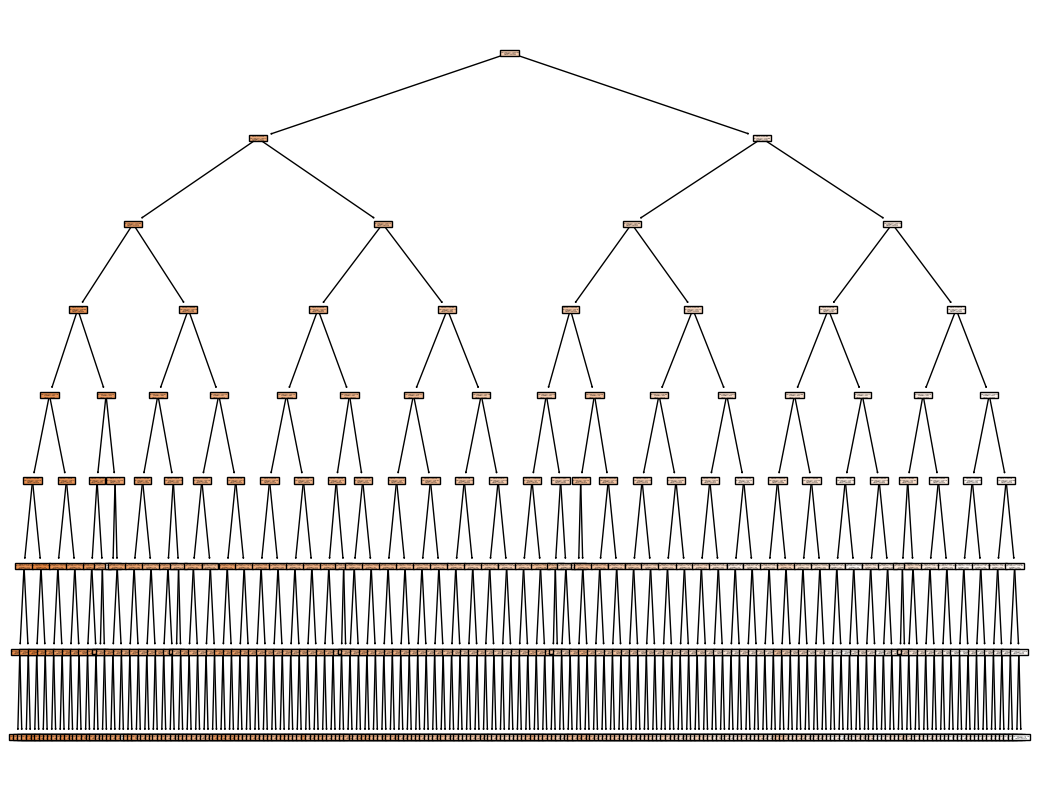

In [73]:
plt.figure(figsize=(13,10))
plot_tree(Tmodel,feature_names=(y) , filled=True)
plt.show()

# MODEL

In [74]:
#svm model

In [75]:
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

In [76]:
svm_model=SVR(kernel='linear',C=1.0)

In [77]:
preprocessing_pipeline=Pipeline([
    ('scaler',StandardScaler()),
])

In [78]:
svm_pipeline=Pipeline([
    ('preprocessor',preprocessing_pipeline),
    ('classifier',svm_model),
])

In [79]:
binarizer=LabelBinarizer()

In [80]:
threshold = 450
y_train_binary = (y_train >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

In [81]:
svm_model.fit(X_train,y_train)

SVR(kernel='linear')

In [82]:
svm_pred=svm_model.predict(X_test)

In [83]:
svm_pred

array([436.10885883, 447.55005473, 454.76265284, ..., 483.75910892,
       439.12965536, 448.35965001])

In [84]:
svm_pred_binary=(svm_pred>=450).astype(int)

In [85]:
svm_accuracy=  accuracy_score(y_test_binary,svm_pred_binary)

In [86]:
svm_accuracy

0.9422875131164743

In [87]:
#Random forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [89]:
rf_regressor=RandomForestRegressor(n_estimators=100,random_state=45)
rf_model=rf_regressor.fit(X_train,y_train)
y_pred=rf_regressor.predict(X_test)

In [91]:
mse=mean_squared_error(y_test,y_pred)

In [92]:
mse

11.043956672287525

In [94]:
r2=r2_score(y_test,y_pred)

In [95]:
r2

0.9620741876747658

In [ ]:
#finding the best model

In [100]:
from sklearn.model_selection import cross_val_score

In [97]:
models = {'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Decission Tree': DecisionTreeRegressor(max_depth=8, criterion='squared_error')
         }

In [101]:
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse = -scores.mean()  # Convert back to positive because cross_val_score returns negative MSE
    print(f"{model_name} - Mean Squared Error: {mse}")


Random Forest - Mean Squared Error: 11.73064735158247
Linear Regression - Mean Squared Error: 20.783533829360042
Support Vector Machine - Mean Squared Error: 198.72212616079293
Decission Tree - Mean Squared Error: 17.85122317781086


In [103]:
best_model_name = min(models, key=lambda k: -cross_val_score(models[k], X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
best_model = models[best_model_name]

In [104]:
best_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
y_pred = best_model.predict(X_test)


In [106]:
mse_test = mean_squared_error(y_test, y_pred)
print(f"\nBest Model ({best_model_name}) - Mean Squared Error on Test Set: {mse_test}")


Best Model (Random Forest) - Mean Squared Error on Test Set: 11.15360000221406
